In [2]:
import os
print(os.getcwd())
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

D:\College\Semester 5\Subjects\Machine Learning


In [3]:
df = pd.read_csv('Data/car_evaluation.csv', header = None)

In [4]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [6]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
for i in col_names:
    print(df[i].value_counts())

high     432
low      432
med      432
vhigh    432
Name: buying, dtype: int64
high     432
low      432
med      432
vhigh    432
Name: maint, dtype: int64
4        432
3        432
2        432
5more    432
Name: doors, dtype: int64
4       576
more    576
2       576
Name: persons, dtype: int64
small    576
big      576
med      576
Name: lug_boot, dtype: int64
high    576
low     576
med     576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [9]:
df.shape

(1728, 7)

In [10]:
X = df.drop(['class'],axis = 1)
y = df['class']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [12]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X_train = enc.fit_transform(X_train)
X_test = enc.transform((X_test))

## Gini index as criterion

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [15]:
y_pred = clf_gini.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score

print(f'Model with gini index gives an accuracy of: {accuracy_score(y_test, y_pred)}')

Model with gini index gives an accuracy of: 0.7572254335260116


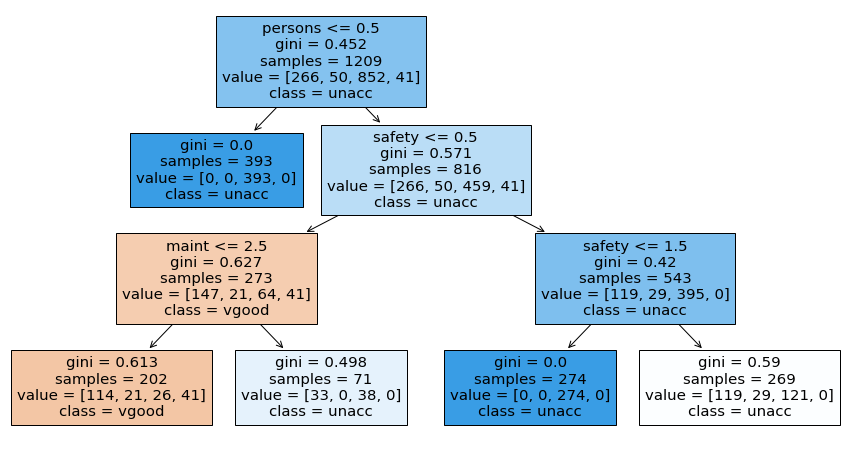

In [17]:
from sklearn import tree
plt.figure(figsize=(15,8))
tree.plot_tree(clf_gini,
               feature_names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'],
               class_names= list(set(y_train)),
               filled = True)
plt.show()

In [19]:
# Check for underfitting/overfitting

print(f'Training set score: {clf_gini.score(X_train,y_train)}')
print(f'Test set score: {clf_gini.score(X_test,y_test)}')

Training set score: 0.7775020678246485
Test set score: 0.7572254335260116


## Entropy as criterion

In [25]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [26]:
y_pred = clf_entropy.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score

print(f'Model with gini index gives an accuracy of: {accuracy_score(y_test, y_pred)}')

Model with gini index gives an accuracy of: 0.9672447013487476


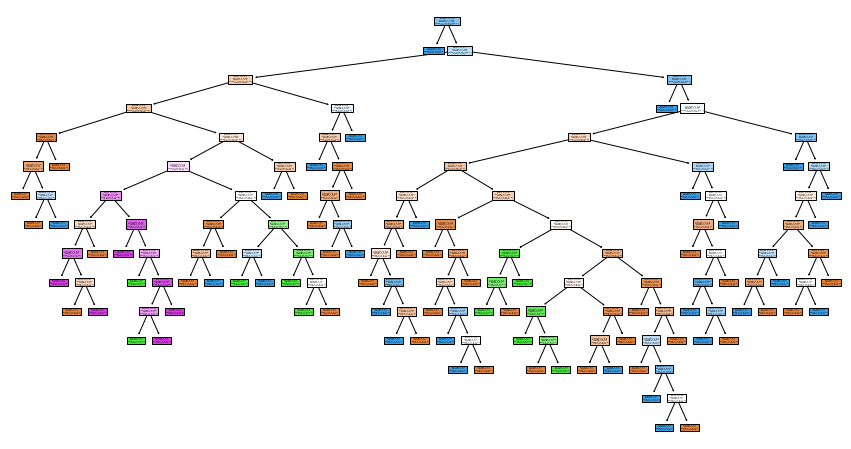

In [28]:
plt.figure(figsize=(15,8))
tree.plot_tree(clf_entropy,
               feature_names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'],
               class_names= list(set(y_train)),
               filled = True)
plt.show()

In [29]:
# Check for underfitting/overfitting

print(f'Training set score: {clf_entropy.score(X_train,y_train)}')
print(f'Test set score: {clf_entropy.score(X_test,y_test)}')

Training set score: 1.0
Test set score: 0.9672447013487476


In [30]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

In [31]:
print(cm)

[[110   6   2   0]
 [  1  18   0   0]
 [  5   0 353   0]
 [  3   0   0  21]]


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.92      0.93      0.93       118
        good       0.75      0.95      0.84        19
       unacc       0.99      0.99      0.99       358
       vgood       1.00      0.88      0.93        24

    accuracy                           0.97       519
   macro avg       0.92      0.94      0.92       519
weighted avg       0.97      0.97      0.97       519

